In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import pandas as pd
import numpy as np
import missingno as msno
from joblib import dump
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [6]:
df_train = pd.read_csv('../data/raw/train.csv', low_memory = False)
df_test = pd.read_csv('../data/raw/test.csv', low_memory = False)

In [7]:
df_train.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,b2716b2d-3422-4959-9fe7-fe496414a4e8,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,bb387960-e3a0-4ffd-96ae-184bad07cb8a,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,89bbdf11-eadd-4de4-95e5-03f7e2874aa1,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0c87ada8-8446-4ea2-a05b-bd07aed5f37a,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,84661e00-ad20-4308-817e-efa8da52a86c,0.0


In [8]:
df_train.shape

(46618, 64)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46618 entries, 0 to 46617
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 46618 non-null  object 
 1   conf                 46618 non-null  object 
 2   GP                   46618 non-null  int64  
 3   Min_per              46618 non-null  float64
 4   Ortg                 46618 non-null  float64
 5   usg                  46618 non-null  float64
 6   eFG                  46618 non-null  float64
 7   TS_per               46618 non-null  float64
 8   ORB_per              46618 non-null  float64
 9   DRB_per              46618 non-null  float64
 10  AST_per              46618 non-null  float64
 11  TO_per               46618 non-null  float64
 12  FTM                  46618 non-null  int64  
 13  FTA                  46618 non-null  int64  
 14  FT_per               46618 non-null  float64
 15  twoPM                46618 non-null 

In [10]:
df_train.describe(include='all')

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
count,46618,46618,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,...,46576.000000,46582.000000,46582.000000,46582.000000,46582.000000,46582.000000,46582.000000,46582.000000,46618,46618.000000
unique,355,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20377,NaN
top,Army,A10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2336a719-c648-440c-821d-32fb0d9760bf,NaN
freq,176,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
mean,NaN,NaN,23.542988,37.339013,91.784360,18.164578,44.424392,47.571397,5.654071,12.575102,...,-0.463778,0.778630,1.867124,2.645755,1.066943,0.527743,0.283606,5.732429,NaN,0.009524
std,NaN,NaN,10.076829,28.019801,30.235568,6.181982,18.026404,17.217909,9.985025,11.041089,...,3.303826,0.745045,1.464894,2.096319,1.170469,0.469654,0.422755,4.942544,NaN,0.097127
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,17.000000,9.600000,83.900000,14.600000,40.000000,43.770000,1.900000,8.400000,...,-1.747553,0.228600,0.681800,1.000000,0.217400,0.157900,0.000000,1.538500,NaN,0.000000
50%,NaN,NaN,28.000000,35.900000,97.000000,18.100000,47.500000,50.720000,4.500000,11.800000,...,-0.335180,0.550000,1.600000,2.235300,0.666700,0.419400,0.131600,4.428600,NaN,0.000000
75%,NaN,NaN,31.000000,62.200000,106.800000,21.800000,53.000000,55.947500,8.200000,15.900000,...,1.048375,1.129000,2.724100,3.806500,1.529000,0.793100,0.366700,9.033050,NaN,0.000000


In [11]:
df_train_c = df_train.copy()
df_test_c = df_test.copy()

<Axes: >

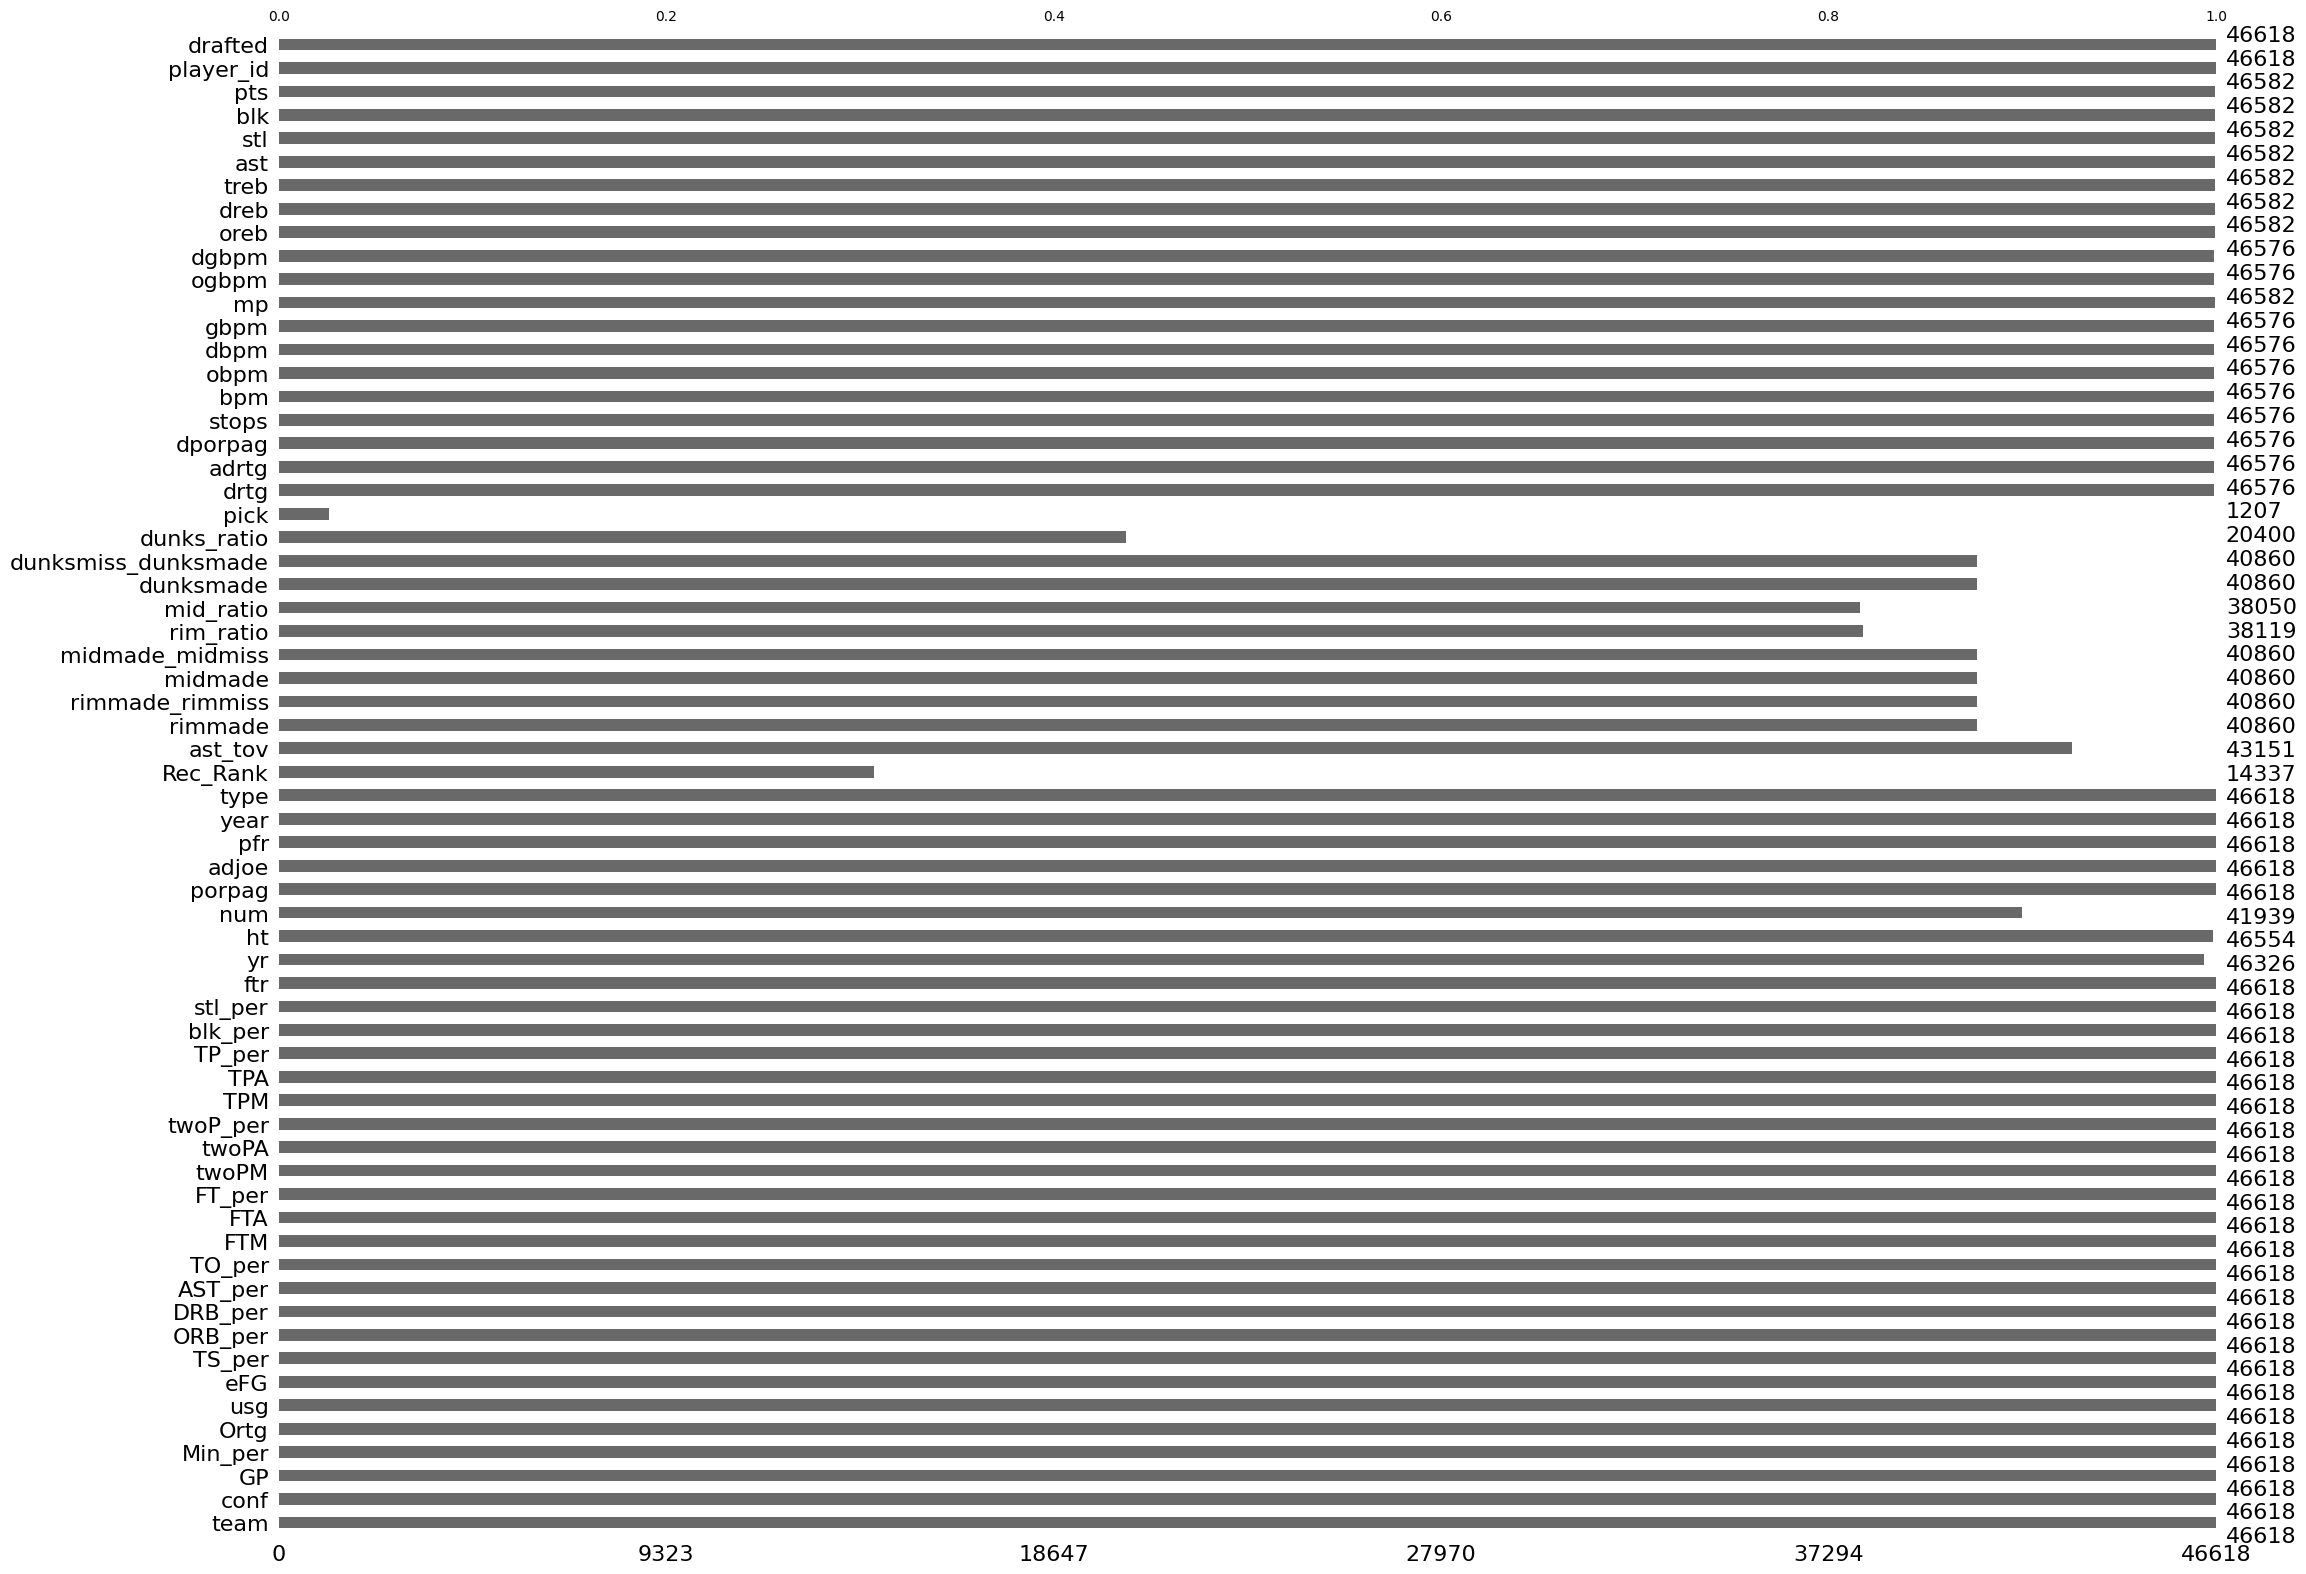

In [12]:
msno.bar(df_train_c)

In [13]:
columns_with_missing = df_train_c.columns[df_train_c.isna().any()]
print("Columns with missing values:", columns_with_missing)
num_columns_with_missing = df_train_c.isna().any().sum()
print("Number of columns with missing values:", num_columns_with_missing)

Columns with missing values: Index(['yr', 'ht', 'num', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss',
       'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade',
       'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg',
       'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm',
       'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts'],
      dtype='object')
Number of columns with missing values: 33


In [14]:
for column in df_train_c.columns:
    mode_value = df_train_c[column].mode()[0]
    df_train_c[column].fillna(mode_value, inplace=True)

/var/folders/02/x13qzty945q3zwz57p2_lzvw0000gn/T/ipykernel_7550/3955420947.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_c[column].fillna(mode_value, inplace=True)
/var/folders/02/x13qzty945q3zwz57p2_lzvw0000gn/T/ipykernel_7550/3955420947.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [15]:
for column in df_test_c.columns:
    mode_value = df_test_c[column].mode()[0]
    df_test_c[column].fillna(mode_value, inplace=True)

/var/folders/02/x13qzty945q3zwz57p2_lzvw0000gn/T/ipykernel_7550/1787377456.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_c[column].fillna(mode_value, inplace=True)
/var/folders/02/x13qzty945q3zwz57p2_lzvw0000gn/T/ipykernel_7550/1787377456.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [16]:
df_train_c.drop(columns=['pick','dunks_ratio','dunksmiss_dunksmade','dunksmade','Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss',
       'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio','num','player_id'],axis=1,inplace=True)

df_test_c.drop(columns=['pick','dunks_ratio','dunksmiss_dunksmade','dunksmade','Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss',
       'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio','num'],axis=1,inplace=True)

In [17]:
num_cols = list(df_train_c.select_dtypes('number').columns)
cat_cols = list(set(df_train_c.columns) - set(num_cols))

In [18]:
ohe = OneHotEncoder(sparse_output=False, drop='first')

In [19]:
features = ohe.fit_transform(df_train_c[cat_cols])

In [20]:
features = pd.DataFrame(features, columns=ohe.get_feature_names_out())

In [21]:
scaler = StandardScaler()
features[num_cols] = scaler.fit_transform(df_train_c[num_cols])

In [22]:
dump(ohe, '../models/ohe.joblib')
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']

In [23]:
all_cat=df_train_c.select_dtypes(include=['object'])
all_cat.head()

,team,conf,yr,ht,type
0,South Alabama,SB,So,2-Jun,all
1,Utah St.,WAC,So,4-Jun,all
2,South Florida,BE,Sr,4-Jun,all
3,Pepperdine,WCC,Sr,4-Jun,all
4,Pacific,BW,Sr,8-Jun,all


In [24]:
unique_team = df_train_c['team'].nunique()
unique_team

355

In [25]:
unique_conf_values = df_train_c['conf'].nunique()
unique_conf_values

36

In [26]:
unique_years = df_train_c['yr'].unique()
unique_years

array(['So', 'Sr', 'Jr', 'Fr', '0', '57.1', '42.9'], dtype=object)

In [27]:
unique_years = df_test_c['yr'].unique()
unique_years

array(['Sr', 'Jr', 'So', 'Fr'], dtype=object)

In [28]:
replace = ['So', 'Sr', 'Jr', 'Fr']
df_train_c['yr'] = df_train_c['yr'].apply(lambda x: x if x in replace else 'others')

In [29]:
unique_ht = df_train_c['ht'].unique()
unique_ht

array(['2-Jun', '4-Jun', '8-Jun', '1-Jun', '5-Jun', 'Jun-00', '6-Jun',
       '9-Jun', '3-Jun', '11-Jun', '7-Jun', '10-May', '10-Jun', '11-May',
       '9-May', 'Jul-00', '7-May', '5-Jul', '8-May', '6-May', '2-Jul',
       '1-Jul', '-', '3-May', '3-Jul', 'Apr-00', '5-May', '4-Jul', 'So',
       'Jr', 'Fr', "6'4", '4-May', '0', '1-May', '6-Jul', '5-Apr',
       '2-May'], dtype=object)

In [30]:
df_train_c.drop(columns=["ht"],axis=1,inplace=True)
df_test_c.drop(columns=["ht"],axis=1,inplace=True)

In [31]:
unique_type = df_train_c['type'].nunique()
unique_type

1

In [32]:
df_train_c.drop(columns=["type"],axis=1,inplace=True)
df_test_c.drop(columns=["type"],axis=1,inplace=True)

In [33]:
df_train_c = pd.get_dummies(df_train_c, columns=['yr'], drop_first=True)

ohe_columns = [col for col in df_train_c.columns if col.startswith('yr_')]
df_train_c[ohe_columns] = df_train_c[ohe_columns].astype(int)

In [34]:
df_test_c = pd.get_dummies(df_test_c, columns=['yr'], drop_first=True)

ohe_columns = [col for col in df_test_c.columns if col.startswith('yr_')]
df_test_c[ohe_columns] = df_test_c[ohe_columns].astype(int)

In [35]:
df_train_c.drop(columns=["yr_others"],axis=1,inplace=True)

In [36]:
le = LabelEncoder()

df_train_c['team'] = le.fit_transform(df_train_c['team'])
df_train_c['conf'] = le.fit_transform(df_train_c['conf'])

df_test_c['team'] = le.fit_transform(df_test_c['team'])
df_test_c['conf'] = le.fit_transform(df_test_c['conf'])

In [37]:
y = df_train_c["drafted"]
X = df_train_c.drop(["drafted"],axis=1)

In [38]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [39]:
print(X_res.shape)
print(y_res.shape)

(92348, 49)
(92348,)


In [40]:
y_res.value_counts(normalize=True)

drafted
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

In [41]:
X_data, X_test, y_data, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [43]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(59102, 49)
(14776, 49)
(18470, 49)


In [44]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(59102,)
(14776,)
(18470,)


In [45]:
pred_value = y_train.mean()

In [46]:
y_base = np.full((len(y_train), 1), pred_value)

In [47]:
print(rmse(y_base, y_train))
print(mae(y_base, y_train))

0.4999993942246861
0.49999878845010615


In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [49]:
xgb_clf = xgb.XGBClassifier()

param_dist = {"n_estimators": [250,350,450],
              "max_depth": range(15,20,1),
              "gamma":[0.05,0.06],
              "eta" : [0.1,0.2,0.3]
            
             }

cv_log= StratifiedKFold(n_splits=5)

grid = GridSearchCV(xgb_clf, param_dist, cv = cv_log , refit=True, scoring='roc_auc', verbose=2)
grid.fit(X_train_scaled, y_train)

print("Best hyperparameters:", grid.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END eta=0.1, gamma=0.05, max_depth=15, n_estimators=250; total time=   1.8s
[CV] END eta=0.1, gamma=0.05, max_depth=15, n_estimators=250; total time=   1.9s
[CV] END eta=0.1, gamma=0.05, max_depth=15, n_estimators=250; total time=   1.9s
[CV] END eta=0.1, gamma=0.05, max_depth=15, n_estimators=250; total time=   1.9s
[CV] END eta=0.1, gamma=0.05, max_depth=15, n_estimators=250; total time=   1.9s
[CV] END eta=0.1, gamma=0.05, max_depth=15, n_estimators=350; total time=   1.9s
[CV] END eta=0.1, gamma=0.05, max_depth=15, n_estimators=350; total time=   1.9s
[CV] END eta=0.1, gamma=0.05, max_depth=15, n_estimators=350; total time=   1.9s
[CV] END eta=0.1, gamma=0.05, max_depth=15, n_estimators=350; total time=   1.9s
[CV] END eta=0.1, gamma=0.05, max_depth=15, n_estimators=350; total time=   2.0s
[CV] END eta=0.1, gamma=0.05, max_depth=15, n_estimators=450; total time=   2.0s
[CV] END eta=0.1, gamma=0.05, max_depth=15, n_e

In [50]:
model_s1 = xgb.XGBClassifier(eta=0.1, gamma=0.06, max_depth=15, n_estimators=250)
model_s1 = model_s1.fit(X_train_scaled, y_train)

In [51]:
dump(model_s1 , '../models/XGBOOST_s1.py')

['../models/XGBOOST_s1.py']

In [53]:
pred_1 = model_s1.predict_proba(X_val_scaled)
pred_2 = model_s1.predict_proba(X_test_scaled)

In [54]:
fpr1, tpr1, thr1 = roc_curve(y_val, pred_1[:,1],pos_label=1)
fpr2, tpr2, thr2 = roc_curve(y_test, pred_2[:,1],pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

random_probs = [0 for i in range(len(y_val))]
p_fpr1, p_tpr1, _ = roc_curve(y_val, random_probs, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr2, p_tpr2, _ = roc_curve(y_test, random_probs, pos_label=1)

In [55]:
auc_sc_1 = roc_auc_score(y_val, pred_1[:,1])
auc_sc_2 = roc_auc_score(y_test, pred_2[:,1])

print(auc_sc_1)
print(auc_sc_2)

0.9997483890744923
0.9997539817545604


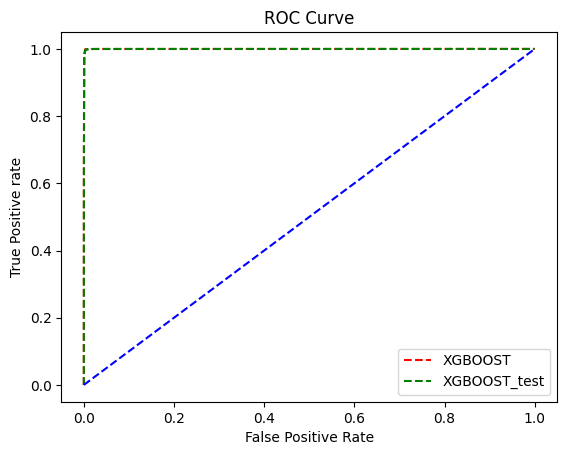

In [56]:
plt.style.use('seaborn-v0_8-bright')

plt.plot(fpr1, tpr1, linestyle='--',color='red', label='XGBOOST')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='XGBOOST_test')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

In [58]:
player_id = df_test_c["player_id"]

X_test = df_test_c.drop(["player_id"], axis=1)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

test_pred = model_s1.predict_proba(X_test_scaled)[:, 1]

submission_df = pd.DataFrame({
    "player_id": player_id,
    "drafted": test_pred
})

submission_df.to_csv("submission_s1.csv", index=False)